# Regression using ANN

## --------PRIYAM SAHA (CSE-A, Roll - 2051267)

## Please implement ANN as an estimator. Execute your program on the data provided earlier (named "MV_Reg_noisy_data.csv").  Please compare the performance with the linear and non-linear regressions you have implemented.

### 1.  Importing the dataset

In [1]:
import pandas as pd
data_set = pd.read_csv("C:/Users/DELL/Desktop/HITK ML NOTEBOOKS/MV_Reg_noisy_data.csv")

In [2]:
data_set

,x,y
0,3.068406,-3.755872
1,1.923489,-4.195847
2,1.888703,-0.728367
3,3.663629,0.933993
4,2.265348,-5.185469
...,...,...
295,2.704274,-0.890898
296,2.311912,-2.040911
297,0.956126,-4.873227
298,4.210267,-1.093269


### 2. Visualizing all the points in the dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

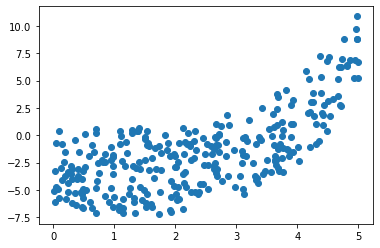

In [4]:
x = []
y = []

file_name = "C:/Users/DELL/Desktop/HITK ML NOTEBOOKS/MV_Reg_noisy_data.csv"
with open(file_name, mode = 'r') as file:
    csvFile = csv.reader(file)
    flag = 0
    for row in csvFile:
        if flag == 0:
            flag = 1
            continue
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))

plt.scatter(x, y)
plt.show()

## 3. Building the datasets

In [5]:
x = []
y = []

file_name = "C:/Users/DELL/Desktop/HITK ML NOTEBOOKS/MV_Reg_noisy_data.csv"
with open(file_name, mode = 'r') as file:
    csvFile = csv.reader(file)
    flag = 0
    for row in csvFile:
        if flag == 0:
            flag = 1
            continue
        else:
            x.append([1.0, float(row[0])])       # x[i][0] = 1 is taken to adjust for the bias
                                                 # x[i][1] is the actual input feature from given data
            y.append(float(row[1]))

## 4. Regression using ANN 

In [17]:
learning_rate = 0.001
e = 2.7183




def activation_func(x):       #phi = sigmoid function used
    return e**x/(e**x + 1)
def phi_dash(x):
    return e**x / ( (e**x + 1)**2 )




def Regression_using_ANN(input, output, num_of_iterations):
    alpha = learning_rate
    
    # 16 + 1 = 17 nodes in hidden layer used ( plus 1 to account for bias)
    
    # input layer - 2 + 1 = 3 nodes
    # hidden layer - 16 + 1 = 17 nodes
    # output layer - 1 node
    
    # 3 - 17 - 1
    
    # So, for the hidden layer, weights matrix has dimensions - 17 * 2
    weights1 = []                                           #initial hypothesis
    for i in range(17):
        weights1.append([0.25, 0.25])
        
    # For the output layer, weights matrix has dimensions - 1 * 17
    weights2 = [[]]                                           #initial hypothesis
    for i in range(17):
        weights2[0].append(0.25)
    
    
    E = []
    iteration = []                  
    
    for iter in range(0, num_of_iterations):
        
        e = np.zeros(len(input), dtype = float)
        
        u1 = np.zeros([len(input), 17], dtype = float)
        v1 = np.zeros([len(input), 17], dtype = float)            # Hidden Layer
        
        u2 = np.zeros([len(input), 1], dtype = float)
        v2 = np.zeros([len(input), 1], dtype = float)            # Output Layer
        
        
        mse = 0.0
        for n in range(len(input)):
            
            # Feed Forward Algorithm
            
            u1[n][0] = 1.0              # To account for bias in the hidden layer
            v1[n][0] = 1.0
            
            for j in range(1, 17):
                u1[n][j] = 1.0
                for i in range(2):
                    u1[n][j] += input[n][i] * weights1[j][i]
                v1[n][j] = activation_func(u1[n][j])
            
            k = 0
            u2[n][k] = 0.0
            for j in range(0, 17):
                u2[n][k] += weights2[k][j] * v1[n][j]
            v2[n][k] = u2[n][k]
            
            
            error = 0.5 * ((output[n] - v2[n][k])**2)
            e[n] = error
            
            
            
            # Back-Propagation(Rosenblatt's Algorithm)
            
            # First output layer
            for j in range(17):
                weights2[k][j] += alpha * (output[n] - v2[n][k]) * phi_dash(u2[n][k]) * v1[n][j]
            
            # Feedback conveyed to hidden layer
            for i in range(2):
                for j in range(17):
                    summation = weights2[k][j] * (output[n] - v2[n][k]) * phi_dash(u2[n][k])
                    weights1[j][i] += alpha * phi_dash(u1[n][j]) * summation * input[n][i]
                    
                    
                    
            mse += e[n]/len(input)
            
        E.append(mse)
        iteration.append(iter)
        #alpha /= 2
        
    return weights1, weights2, E, iteration

### Training using 70% of the given dataset

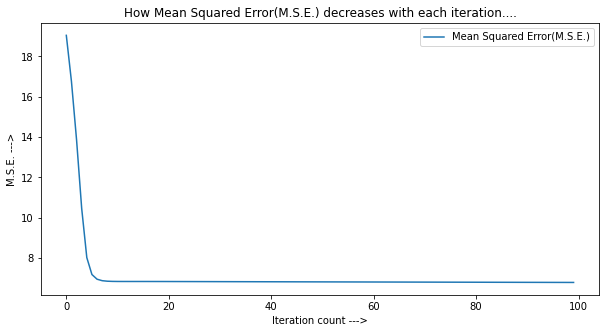

In [22]:
weights1, weights2, E, iteration = Regression_using_ANN(x[:210], y[:210], 100) 
f = plt.figure()
f.set_figwidth(10) 
f.set_figheight(5)
plt.plot(iteration, E, label = "Mean Squared Error(M.S.E.)")
plt.title("How Mean Squared Error(M.S.E.) decreases with each iteration....")
plt.xlabel("Iteration count --->")
plt.ylabel("M.S.E. --->")
plt.legend()
plt.show() 

In [23]:
print("MSE error on the training dataset at the end of 100 epochs : ", round(E[-1], 5))

MSE error on the training dataset at the end of 100 epochs :  6.786


### Testing using remaining 30% of the given dataset

In [24]:
e = 2.7183




def activation_func(x):       #phi = sigmoid function used
    return e**x/(e**x + 1)
def phi_dash(x):
    return e**x / ( (e**x + 1)**2 )




def Test_analysis_ANN(input, output):
        
    u1 = np.zeros([len(input), 17], dtype = float)
    v1 = np.zeros([len(input), 17], dtype = float)            # Hidden Layer
        
    u2 = np.zeros([len(input), 1], dtype = float)
    v2 = np.zeros([len(input), 1], dtype = float)            # Output Layer
        
        
    mse = 0.0
    for n in range(len(input)):
        # Feed Forward Algorithm
            
        u1[n][0] = 1.0              # To account for bias in the hidden layer
        v1[n][0] = 1.0
            
        for j in range(1, 17):
            u1[n][j] = 1.0
            for i in range(2):
                u1[n][j] += input[n][i] * weights1[j][i]
            v1[n][j] = activation_func(u1[n][j])
            
        k = 0
        u2[n][k] = 0.0
        for j in range(0, 17):
            u2[n][k] += weights2[k][j] * v1[n][j]
        v2[n][k] = u2[n][k]
            
            
        error = 0.5 * ((output[n] - v2[n][k])**2)
        mse += error/len(input)
        
    return mse

In [25]:
mse = Test_analysis_ANN(x[210:], y[210:]) 
print("Mean Squared Error on the test dataset in case of regression using ANN: ", round(mse, 5))

Mean Squared Error on the test dataset in case of regression using ANN:  5.1796


## 5. Comparing with linear and non-linear regressions

### A. Linear Regression

In [114]:
x = []
y = []

file_name = "C:/Users/DELL/Desktop/HITK ML NOTEBOOKS/MV_Reg_noisy_data.csv"
with open(file_name, mode = 'r') as file:
    csvFile = csv.reader(file)
    flag = 0
    for row in csvFile:
        if flag == 0:
            flag = 1
            continue
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))

In [115]:
alpha = 0.01          # Learning rate 

def lin_regression(num_of_iterations, num_of_training_samples):
    in_sample_error = []
    out_sample_error = []
    iteration = []
    i = 1
    w = [5.0, 5.0]         # Initial assumption
    while (i <= num_of_iterations):
        j = 0
        while j < num_of_training_samples:
            X = x[j]
            Y = y[j]
            w[0] -= alpha * ( w[0] + w[1]*X - Y)
            w[1] -= alpha * ( w[0] + w[1]*X - Y)*X
            j += 1
        
        j = 0
        in_error = 0
        while j < num_of_training_samples:
            X = x[j]
            Y = y[j]
            in_error += ((Y - w[0] - w[1]*X)**2)
            j += 1
        in_error = in_error / num_of_training_samples 
        
        j = num_of_training_samples
        out_error = 0
        while j < 300:
            X = x[j]
            Y = y[j]
            out_error += ((Y - w[0] - w[1]*X)**2)
            j += 1
        out_error = out_error / (300 - num_of_training_samples)
        
        in_sample_error.append(in_error)
        out_sample_error.append(out_error)
        iteration.append(i)
        i +=1
    return w, iteration, in_sample_error, out_sample_error

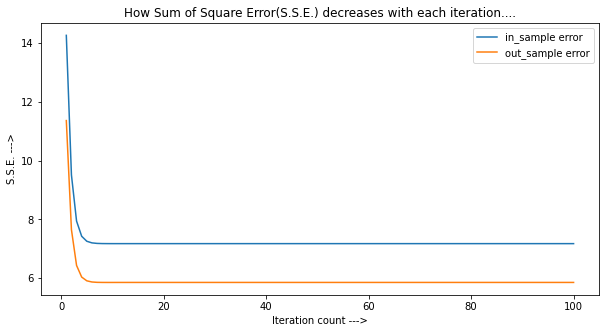

In [116]:
coefficients, iteration, in_sample_error, out_sample_error = lin_regression(100, 210)
f = plt.figure()
f.set_figwidth(10)    
f.set_figheight(5)
plt.plot(iteration, in_sample_error, label = "in_sample error")
plt.plot(iteration, out_sample_error, label = "out_sample error")
plt.title("How Sum of Square Error(S.S.E.) decreases with each iteration....")
plt.xlabel("Iteration count --->")
plt.ylabel("S.S.E. --->")
plt.legend()
plt.show() 

In [117]:
print("Mean Squared Error on the test dataset in case of Linear regression: ", round(out_sample_error[-1], 5))

Mean Squared Error on the test dataset in case of Linear regression:  5.85088


### B. Cubic Regression

In [118]:
alpha = 0.0001          # Learning rate 

def cubic_regression(num_of_iterations, num_of_training_samples):
    in_sample_error = []
    out_sample_error = []
    iteration = []
    i = 1
    w = [2, 2, 2, 2]      # Initial assumption
    while (i <= num_of_iterations):
        j = 0
        while j < num_of_training_samples:
            X = x[j]
            Y = y[j]
            w[0] -= alpha * ( w[0] + w[1]*X + w[2]*X*X + w[3]*X*X*X - Y)
            w[1] -= alpha * ( w[0] + w[1]*X + w[2]*X*X + w[3]*X*X*X - Y)*X
            w[2] -= alpha * ( w[0] + w[1]*X + w[2]*X*X + w[3]*X*X*X - Y)*X**2
            w[3] -= alpha * ( w[0] + w[1]*X + w[2]*X*X + w[3]*X*X*X - Y)*X**3
            j += 1
        
        j = 0
        in_error = 0
        while j < num_of_training_samples:
            X = x[j]
            Y = y[j]
            in_error += (Y - w[0] - w[1]*X - w[2]*X*X - w[3]*X*X*X)**2
            j += 1
        in_error = in_error / num_of_training_samples
        
        j = num_of_training_samples
        out_error = 0
        while j < 300:
            X = x[j]
            Y = y[j]
            out_error += ((Y - w[0] - w[1]*X - w[2]*X*X - w[3]*X*X*X)**2)
            j += 1
        out_error = out_error / (300 - num_of_training_samples)
        
        in_sample_error.append(in_error)
        out_sample_error.append(out_error)
        iteration.append(i)
        i +=1
    return w, iteration, in_sample_error, out_sample_error

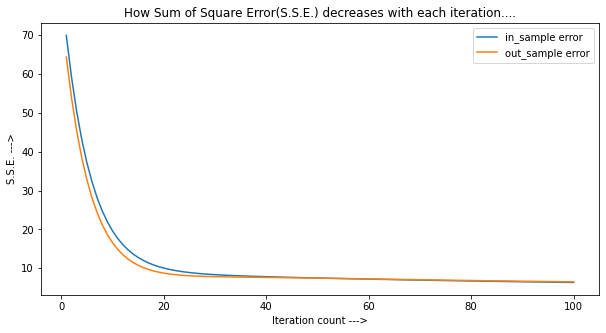

In [119]:
coefficients, iteration, in_sample_error, out_sample_error = cubic_regression(100, 210)
f = plt.figure()
f.set_figwidth(10)    
f.set_figheight(5)
plt.plot(iteration, in_sample_error, label = "in_sample error")
plt.plot(iteration, out_sample_error, label = "out_sample error")
plt.title("How Sum of Square Error(S.S.E.) decreases with each iteration....")
plt.xlabel("Iteration count --->")
plt.ylabel("S.S.E. --->")
plt.legend()
plt.show() 

In [120]:
print("Mean Squared Error on the test dataset in case of Non-Linear(Cubic) regression: ", round(out_sample_error[-1], 5))

Mean Squared Error on the test dataset in case of Non-Linear(Cubic) regression:  6.51191


## 6. Summary

### The Mean Squared Error(MSE) as computed on the test dataset (last 30% of the given data), was found to be ---    ANN Estimation ---->  5.1796,                                                                                                                                                    Linear  Regression  -----> 5.85088 ,                                                                                                                                          Non-Linear Regression(cubic polynomial) ----->  6.51191.

## 7. CONCLUSION 

### The ANN Estimation worked better than both Linear and Non-Linear Regression with the given dataset having non-linear dependencies(generated using polynomial function of degree 4)